In [1]:
import pandas as pd
data = pd.read_csv('DSFootballprojectdata.csv')
data

,Home_Team,Away_Team,Season,Round,Home_Score,Away_Score,Home_Win,Away_Win,Draw,Elo_Home,...,Home_Team_Loss_Number,Away_Team_Loss_Number,Home_Score_for_Number,Home_Score_against_Number,Away_Score_for_Number,Away_Score_against_Number,Home_Team_for_Average,Home_Team_against_Average,Away_Team_for_Average,Away_Team_against_Average
0,Saarbrücken,Stuttgarter Kickers,1990,1,1,0.0,1,0,0,56.0,...,-180.0,-186.0,267,-204.0,186.0,-281,1.570588,-1.200000,1.010870,-1.527174
1,SC Freiburg,Unterhaching,1990,1,2,3.0,0,1,0,53.0,...,-534.0,-248.0,890,-651.0,228.0,-398,1.633028,-1.194495,0.995633,-1.737991
2,VfL Osnabrück,Meppen,1990,1,1,1.0,0,0,1,52.0,...,-208.0,-157.0,267,-249.0,124.0,-251,1.517045,-1.414773,0.837838,-1.695946
3,RW Essen,Schalke 04,1990,1,0,0.0,0,0,1,53.0,...,-128.0,-492.0,151,-137.0,648.0,-813,1.398148,-1.268519,1.186813,-1.489011
4,Alemannia Aachen,MSV Duisburg,1990,1,1,2.0,0,1,0,57.0,...,-237.0,-483.0,400,-300.0,523.0,-731,1.666667,-1.250000,1.110403,-1.552017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146493,Lecce,SPAL,2021,33,1,2.0,0,1,0,0.0,...,-442.0,-131.0,538,-478.0,106.0,-161,1.315403,-1.168704,0.929825,-1.412281
146494,Frosinone,Cittadella,2021,33,1,1.0,0,0,1,0.0,...,-258.0,-292.0,326,-283.0,307.0,-390,1.347107,-1.169421,1.092527,-1.387900
146495,Reggina,Vicenza,2021,33,3,0.0,1,0,0,0.0,...,-369.0,-467.0,415,-341.0,404.0,-608,1.195965,-0.982709,0.922374,-1.388128
146496,Venezia,Nuova Cosenza,2021,33,3,0.0,1,0,0,0.0,...,-310.0,-61.0,391,-300.0,57.0,-72,1.273616,-0.977199,1.075472,-1.358491


In [2]:
data.fillna( method ='ffill', inplace = True)

In [3]:
X = data.drop(['Home_Win', 'Away_Win','Draw','Home_Team','Away_Team','Elo_Home','Elo_Away'], axis=1)

In [4]:
Y = data[['Home_Win','Away_Win','Draw']]

In [5]:
Y = Y.to_numpy()
Y

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [69]:
from keras.utils.np_utils import to_categorical   
Y = to_categorical(Y, num_classes=3)
Y

array([[[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.]],

       ...,

       [[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]], dtype=float32)

In [6]:
X.shape

(146498, 21)

In [7]:
Y.shape

(146498, 3)

In [8]:
# Create training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [9]:
Y_train.shape

(102548, 3)

In [10]:
Y_test.shape

(43950, 3)

In [76]:
Y_testdf = pd.DataFrame(Y_test)

In [77]:
import numpy as np
Y_test_new = pd.DataFrame([x for x in np.where(Y_testdf ==1, Y_testdf.columns,'').flatten().tolist() if len(x) >0],columns= (["class"]) )

In [78]:
Y_test_new

,class
0,0
1,2
2,0
3,0
4,2
...,...
43943,1
43944,1
43945,2
43946,1


In [79]:
Y_test_new['class'].astype(int)

0        0
1        2
2        0
3        0
4        2
        ..
43943    1
43944    1
43945    2
43946    1
43947    2
Name: class, Length: 43948, dtype: int64

In [65]:
Y_test_new = Y_test_new['class'].tolist()
Y_test_new

['0',
 '2',
 '0',
 '0',
 '2',
 '2',
 '2',
 '1',
 '0',
 '2',
 '1',
 '2',
 '0',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '0',
 '2',
 '0',
 '2',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '1',
 '2',
 '2',
 '0',
 '2',
 '2',
 '2',
 '1',
 '0',
 '2',
 '0',
 '0',
 '0',
 '2',
 '1',
 '0',
 '1',
 '2',
 '2',
 '1',
 '0',
 '2',
 '1',
 '2',
 '0',
 '0',
 '0',
 '2',
 '2',
 '2',
 '1',
 '0',
 '1',
 '2',
 '0',
 '0',
 '0',
 '2',
 '1',
 '0',
 '2',
 '0',
 '1',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '0',
 '2',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '2',
 '0',
 '0',
 '2',
 '0',
 '1',
 '1',
 '1',
 '0',
 '2',
 '2',
 '0',
 '1',
 '2',
 '0',
 '2',
 '1',
 '1',
 '0',
 '0',
 '2',
 '0',
 '1',
 '1',
 '0',
 '2',
 '2',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '2',
 '1',
 '1',
 '0',
 '2',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '2',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '2',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '2',
 '0',
 '2',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0'

In [49]:
Y_test_new = np.asarray(Y_test_new)

In [80]:
Y_test_new

,class
0,0
1,2
2,0
3,0
4,2
...,...
43943,1
43944,1
43945,2
43946,1


In [87]:
Y_test_new.to_numpy()

array([['0'],
       ['2'],
       ['0'],
       ...,
       ['2'],
       ['1'],
       ['2']], dtype=object)

In [16]:
# Create validation and test split
#
X_val, Xnew_test, Y_val, Ynew_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)
# X_val_std = ss.transform(X_val)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras import layers
from tensorflow.keras import optimizers

2022-05-24 19:59:12.019793: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-24 19:59:12.019864: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
def build_classifier():
    network = models.Sequential()
    network.add(layers.Dense(15, activation='relu', input_shape=(21,)))
    network.add(layers.Dense(10, activation='relu'))
    network.add(layers.Dense(3, activation='softmax'))
    #
    # Configure the network with optimizer, loss function and accuracy
    #
    network.compile(optimizer=optimizers.Adam(lr=0.01),
                    loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [14]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_classifier, epochs=20, batch_size=60)

/tmp/ipykernel_9773/3166071793.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_classifier, epochs=20, batch_size=60)


In [15]:
Y_train.shape

(102548, 3)

In [16]:
model.fit(X_train_std,Y_train)

2022-05-23 20:48:26.373788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-23 20:48:26.373816: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-23 20:48:26.373843: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (christopher-Inspiron-5570): /proc/driver/nvidia/version does not exist
2022-05-23 20:48:26.375031: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning:

Epoch 1/20
1710/1710 [==============================] - 5s 2ms/step - loss: 0.0263 - accuracy: 0.9897
Epoch 2/20
1710/1710 [==============================] - 4s 2ms/step - loss: 9.0834e-06 - accuracy: 1.0000
Epoch 3/20
1710/1710 [==============================] - 4s 2ms/step - loss: 2.2706e-06 - accuracy: 1.0000
Epoch 4/20
1710/1710 [==============================] - 4s 2ms/step - loss: 9.9111e-07 - accuracy: 1.0000
Epoch 5/20
1710/1710 [==============================] - 4s 2ms/step - loss: 4.4746e-07 - accuracy: 1.0000
Epoch 6/20
1710/1710 [==============================] - 4s 2ms/step - loss: 1.9891e-04 - accuracy: 1.0000
Epoch 7/20
1710/1710 [==============================] - 4s 2ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 8/20
1710/1710 [==============================] - 4s 2ms/step - loss: 2.2328e-06 - accuracy: 1.0000
Epoch 9/20
1710/1710 [==============================] - 4s 2ms/step - loss: 8.0900e-07 - accuracy: 1.0000
Epoch 10/20
1710/1710 [==============================]

In [31]:
y_pred = model.predict(X_test_std)
y_pred

array([0, 2, 0, ..., 2, 1, 2])

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
integer_encoded = label_encoder.fit_transform(y_pred)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[0 2 0 ... 2 1 2]
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [27]:
classes = y_pred

In [28]:
classes

array([0, 0, 0, ..., 2, 0, 2])

In [29]:
y_pred = pd.get_dummies(y_pred)
y_pred.to_numpy()

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [81]:
y_preddf = pd.DataFrame(y_pred)

In [82]:
y_pred_new = pd.DataFrame([x for x in np.where(y_preddf ==1, y_preddf.columns,'').flatten().tolist() if len(x) >0],columns= (["class"]) )

In [90]:
y_pred_new.to_numpy()

array([['0'],
       ['0'],
       ['0'],
       ...,
       ['2'],
       ['0'],
       ['2']], dtype=object)

In [91]:
Y_test_new.to_numpy()

array([['0'],
       ['2'],
       ['0'],
       ...,
       ['2'],
       ['1'],
       ['2']], dtype=object)

In [37]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y_test, onehot_encoded)

array([[[23665,     0],
        [    0, 20285]],

       [[32678,     0],
        [    0, 11272]],

       [[31557,     2],
        [    0, 12391]]])

In [38]:
from sklearn.metrics import classification_report
classes = {'0','1','2'}
print(classification_report(Y_test, onehot_encoded,target_names=classes))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20285
           0       1.00      1.00      1.00     11272
           2       1.00      1.00      1.00     12391

   micro avg       1.00      1.00      1.00     43948
   macro avg       1.00      1.00      1.00     43948
weighted avg       1.00      1.00      1.00     43948
 samples avg       1.00      1.00      1.00     43948



/home/christopher/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC AUC score: 0.9999894377726375


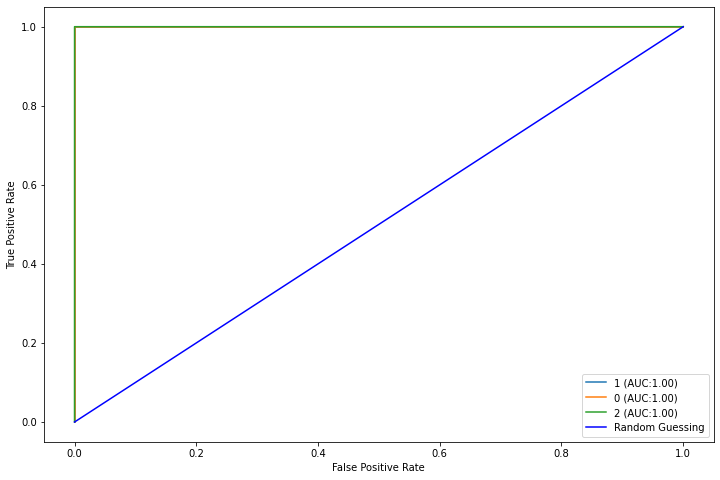

In [34]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

classes = {'0','1','2'}

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(Y_test, onehot_encoded, average="macro"):
    lb = LabelBinarizer()
    lb.fit(Y_test)
    Y_test = lb.transform(Y_test)

    for (idx, c_label) in enumerate(classes):
        fpr, tpr, thresholds = roc_curve(Y_test[:,idx].astype(int), onehot_encoded[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(Y_test, onehot_encoded, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(Y_test, onehot_encoded))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

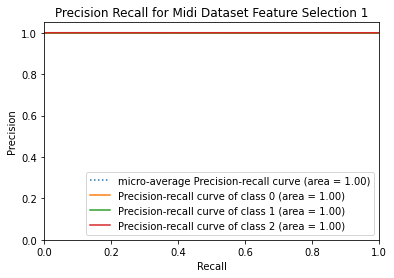

In [36]:
n_classes=3
# Compute Precision-Recall and plot curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        onehot_encoded[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], onehot_encoded[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    onehot_encoded.ravel())
average_precision["micro"] = average_precision_score(Y_test, onehot_encoded,
                                                     average="micro")


# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]), linestyle=':')
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall for Midi Dataset Feature Selection 1')
plt.legend(loc="lower right")
plt.show()

In [22]:
def build_classifier():
    network = models.Sequential()
    network.add(layers.Dense(5, activation='relu', input_shape=(21,)))
    network.add(layers.Dense(3, activation='softmax'))
    #
    # Configure the network with optimizer, loss function and accuracy
    #
    network.compile(optimizer=optimizers.Adam(lr=0.01),
                    loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [45]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_classifier, epochs=2, batch_size=20)

/tmp/ipykernel_7144/3130689328.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_classifier, epochs=2, batch_size=20)


In [46]:
model.fit(X_train_std,Y_train)

Epoch 1/2


/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


5128/5128 [==============================] - 11s 2ms/step - loss: 0.0254 - accuracy: 0.9926
Epoch 2/2
5128/5128 [==============================] - 11s 2ms/step - loss: 1.5614e-05 - accuracy: 1.0000


In [47]:
y_pred = model.predict(X_test_std)
y_pred

array([0, 2, 0, ..., 2, 1, 2])

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
integer_encoded = label_encoder.fit_transform(y_pred)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[0 2 0 ... 2 1 2]
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [49]:
y_pred = pd.get_dummies(y_pred)
y_pred.to_numpy()

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [50]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y_test, onehot_encoded)
from sklearn.metrics import classification_report
classes = {'0','1','2'}
print(classification_report(Y_test, onehot_encoded,target_names=classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20285
           2       1.00      1.00      1.00     11272
           1       1.00      1.00      1.00     12391

   micro avg       1.00      1.00      1.00     43948
   macro avg       1.00      1.00      1.00     43948
weighted avg       1.00      1.00      1.00     43948
 samples avg       1.00      1.00      1.00     43948



/home/christopher/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y_test, y_pred)
from sklearn.metrics import classification_report
classes = {'0','1','2'}
print(classification_report(Y_test, y_pred,target_names=classes))
print(multilabel_confusion_matrix(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20285
           2       1.00      1.00      1.00     11272
           1       1.00      1.00      1.00     12391

   micro avg       1.00      1.00      1.00     43948
   macro avg       1.00      1.00      1.00     43948
weighted avg       1.00      1.00      1.00     43948
 samples avg       1.00      1.00      1.00     43948

[[[23665     0]
  [    0 20285]]

 [[32678     0]
  [    0 11272]]

 [[31557     2]
  [    0 12391]]]


/home/christopher/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC AUC score: 0.9999894377726375


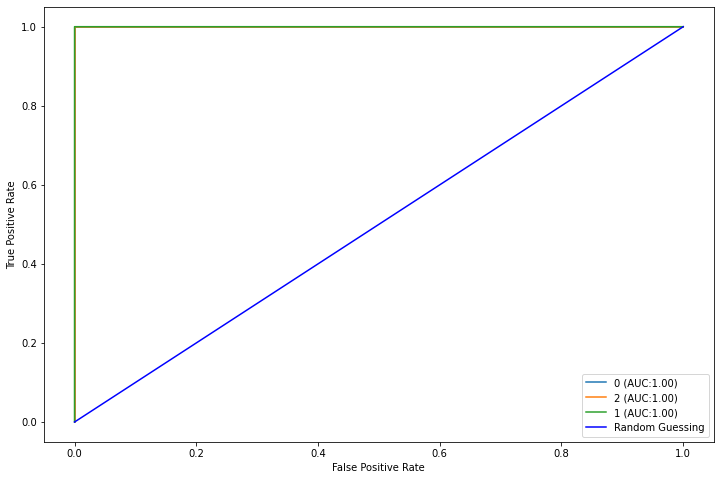

In [52]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

classes = {'0','1','2'}

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(Y_test, onehot_encoded, average="macro"):
    lb = LabelBinarizer()
    lb.fit(Y_test)
    Y_test = lb.transform(Y_test)

    for (idx, c_label) in enumerate(classes):
        fpr, tpr, thresholds = roc_curve(Y_test[:,idx].astype(int), onehot_encoded[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(Y_test, onehot_encoded, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(Y_test, onehot_encoded))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

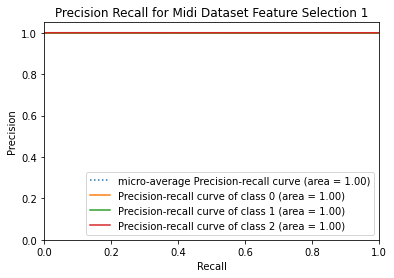

In [53]:
n_classes=3
# Compute Precision-Recall and plot curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        onehot_encoded[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], onehot_encoded[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    onehot_encoded.ravel())
average_precision["micro"] = average_precision_score(Y_test, onehot_encoded,
                                                     average="micro")


# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]), linestyle=':')
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall for Midi Dataset Feature Selection 1')
plt.legend(loc="lower right")
plt.show()

In [54]:
# Process of plotting roc-auc curve belonging to all classes.

n_classes=3

from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()

KeyError: 0

In [95]:
y_pred.shape

(43950, 3)

In [96]:
y_pred

,0,1,2
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
43945,0,1,0
43946,0,1,0
43947,0,0,1
43948,0,1,0


In [97]:
y_pred.to_numpy()

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [98]:
Ynew_test

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [100]:
y_pred.shape

(43950, 3)

In [102]:
Y_test.shape

(43950, 3)

In [103]:
from sklearn.metrics import classification_report
classes = {'0','1','2'}
print(classification_report(Y_test, y_pred,target_names=classes))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00     20285
           1       1.00      1.00      1.00     11272
           0       1.00      1.00      1.00     12391

   micro avg       1.00      1.00      1.00     43948
   macro avg       1.00      1.00      1.00     43948
weighted avg       1.00      1.00      1.00     43948
 samples avg       1.00      1.00      1.00     43948



/home/christopher/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
n_classes=3
# Compute Precision-Recall and plot curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_pred[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_pred,
                                                     average="micro")


# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]), linestyle=':')
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall for Midi Dataset Feature Selection 1')
plt.legend(loc="lower right")
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

In [28]:
from keras.utils.np_utils import to_categorical   
y_pred = to_categorical(y_pred, num_classes=3)
y_pred

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
classes_x=np.argmax(y_pred,axis=1)

In [49]:
build_classifier().summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 15)                120       
                                                                 
 dense_12 (Dense)            (None, 10)                160       
                                                                 
 dense_13 (Dense)            (None, 3)                 33        
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [50]:
Y.shape

(146498, 3)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

n_classes = len(np.unique(Ynew_test))
y_test = label_binarize(Ynew_test, classes=np.arange(n_classes))
y_pred = label_binarize(y_pred, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Ynew_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Ynew_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
#plt.figure(figsize=(10,5))
plt.figure(dpi=600)
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
color="deeppink", linestyle=":", linewidth=4,)

plt.plot(fpr["macro"], tpr["macro"],
label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
color="navy", linestyle=":", linewidth=4,)

colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) curve")
plt.legend()


ValueError: classes [0 1] mismatch with the labels [0 1 2] found in the data

TypeError: multiclass_roc_auc_score() takes 1 positional argument but 2 were given

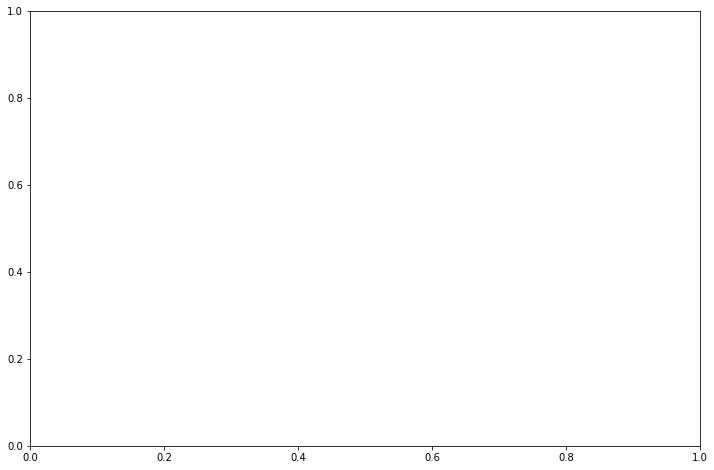

In [106]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(Y_test):
    Y_test = lb.transform(Y_test)

    for (idx, c_label) in enumerate(classes):
        fpr, tpr, thresholds = roc_curve(Y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(Y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(Y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [27]:
def build_classifier(neurons=1):
    network = models.Sequential()
    network.add(layers.Dense(neurons, activation='relu', input_shape=(7,)))
    network.add(layers.Dense(10, activation='relu'))
    network.add(layers.Dense(3, activation='softmax'))
    #
    # Configure the network with optimizer, loss function and accuracy
    #
    network.compile(optimizer=optimizers.Adam(lr=0.01),
                    loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [29]:
from sklearn.model_selection import GridSearchCV
# create model
model = KerasClassifier(build_fn=build_classifier, epochs=20, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/tmp/ipykernel_9090/514405414.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_classifier, epochs=20, batch_size=10, verbose=0)
2022-05-10 21:17:01.435655: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-10 21:17:01.437035: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-10 21:17:01.804203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-10 21:17:01.804498: I tensorflow/stream_executor/cuda/c

Best: 0.493147 using {'neurons': 5}
0.492491 (0.003510) with: {'neurons': 1}
0.493147 (0.002786) with: {'neurons': 5}
0.489993 (0.002833) with: {'neurons': 10}
0.491973 (0.002686) with: {'neurons': 15}
0.489447 (0.004468) with: {'neurons': 20}
0.492607 (0.001958) with: {'neurons': 25}
0.479829 (0.016256) with: {'neurons': 30}


In [13]:
def build_classifier(neurons=1):
    network = models.Sequential()
    network.add(layers.Dense(5, activation='relu', input_shape=(7,)))
    network.add(layers.Dense(neurons, activation='relu'))
    network.add(layers.Dense(3, activation='softmax'))
    #
    # Configure the network with optimizer, loss function and accuracy
    #
    network.compile(optimizer=optimizers.Adam(lr=0.01),
                    loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [14]:
from sklearn.model_selection import GridSearchCV
# create model
model = KerasClassifier(build_fn=build_classifier, epochs=20, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/tmp/ipykernel_10289/514405414.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_classifier, epochs=20, batch_size=10, verbose=0)
2022-05-11 20:52:46.047596: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-11 20:52:46.047892: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-11 20:52:46.084910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-11 20:52:46.085060: I tensorflow/stream_executor/cuda/

Best: 0.494648 using {'neurons': 10}
0.461467 (0.004070) with: {'neurons': 1}
0.492935 (0.002671) with: {'neurons': 5}
0.494648 (0.003331) with: {'neurons': 10}
0.487283 (0.001423) with: {'neurons': 15}
0.493857 (0.002018) with: {'neurons': 20}
0.492321 (0.002473) with: {'neurons': 25}
0.491802 (0.002901) with: {'neurons': 30}


In [53]:
# define the grid search parameters
from sklearn.model_selection import GridSearchCV
batch_size = [10, 20, 40, 60, 80, 100]
param_grid = dict(batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2022-05-13 13:14:53.301742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-13 13:14:53.302217: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-13 13:14:53.512336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-13 13:14:53.512899: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-13 13:14:53.962580: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or dire

Epoch 1/20


2022-05-13 13:14:59.609819: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-13 13:14:59.610427: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-13 13:14:59.610539: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (christopher-Inspiron-5570): /proc/driver/nvidia/version does not exist
2022-05-13 13:14:59.611469: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-13 13:14:59.715958: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could

Epoch 1/20
Epoch 1/20
Epoch 1/20


2022-05-13 13:15:00.210731: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-13 13:15:00.210806: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-13 13:15:00.210856: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (christopher-Inspiron-5570): /proc/driver/nvidia/version does not exist
2022-05-13 13:15:00.211399: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning:

Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
2442/2442 [==============================] - 20s 7ms/step - loss: 1.0179 - accuracy: 0.4924
Epoch 2/20
2442/2442 [==============================] - 20s 8ms/step - loss: 1.0209 - accuracy: 0.4884
Epoch 2/20
2442/2442 [==============================] - 17s 7ms/step - loss: 1.0140 - accuracy: 0.4936
Epoch 3/20
4884/4884 [==============================] - 36s 7ms/step - loss: 1.0206 - accuracy: 0.4877
Epoch 2/20
4884/4884 [==============================] - 37s 7ms/step - loss: 1.0270 - accuracy: 0.4883
Epoch 2/20
2442/2442 [==============================] - 16s 7ms/step - loss: 1.0138 - accuracy: 0.4945
Epoch 4/20
9767/9767 [==============================] - 68s 7ms/step - loss: 1.0221 - accuracy: 0.4863
Epoch 2/20
4884/4884 [==============================] - 33s 7ms/step - loss: 1.0153 - accuracy: 0.4940
Epoch 3/20
4884/4884 [==============================] - 32s 7ms/step - loss: 1.0165 - accuracy: 0.4913
Epoch 3/20
2442/2442 [==================

/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2442/2442 [==============================] - 14s 5ms/step - loss: 1.0248 - accuracy: 0.4891
Epoch 2/20
4884/4884 [==============================] - 27s 6ms/step - loss: 1.0132 - accuracy: 0.4922
Epoch 12/20
4884/4884 [==============================] - 26s 5ms/step - loss: 1.0126 - accuracy: 0.4943
Epoch 12/20
2442/2442 [==============================] - 14s 6ms/step - loss: 1.0205 - accuracy: 0.4905
Epoch 4/20
4884/4884 [==============================] - 26s 5ms/step - loss: 1.0196 - accuracy: 0.4913
Epoch 13/20
9767/9767 [==============================] - 54s 5ms/step - loss: 1.0158 - accuracy: 0.4898
Epoch 7/20
9767/9767 [==============================] - 54s 6ms/step - loss: 1.0227 - accuracy: 0.4908
Epoch 7/20
 347/9767 [>.............................] - ETA: 52s - loss: 1.0209 - accuracy: 0.4827

/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4884/4884 [==============================] - 29s 6ms/step - loss: 1.0196 - accuracy: 0.4925
Epoch 14/20
4884/4884 [==============================] - 29s 6ms/step - loss: 1.0137 - accuracy: 0.4922
Epoch 14/20
2442/2442 [==============================] - 14s 6ms/step - loss: 1.0198 - accuracy: 0.4924
Epoch 7/20
1628/1628 [==============================] - 11s 7ms/step - loss: 1.0114 - accuracy: 0.4952
Epoch 6/20
2442/2442 [==============================] - 18s 7ms/step - loss: 1.0198 - accuracy: 0.4920
Epoch 8/20
9767/9767 [==============================] - 61s 6ms/step - loss: 1.0142 - accuracy: 0.4944
Epoch 8/20
4884/4884 [==============================] - 32s 7ms/step - loss: 1.0199 - accuracy: 0.4922
Epoch 15/20
9767/9767 [==============================] - 62s 6ms/step - loss: 1.0162 - accuracy: 0.4898
Epoch 8/20
9767/9767 [==============================] - 63s 6ms/step - loss: 1.0222 - accuracy: 0.4898
Epoch 8/20
4884/4884 [==============================] - 33s 7ms/step - loss: 1.01

/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2442/2442 [==============================] - 14s 6ms/step - loss: 1.0193 - accuracy: 0.4927
Epoch 19/20
1628/1628 [==============================] - 12s 6ms/step - loss: 1.0209 - accuracy: 0.4876
Epoch 2/20
9767/9767 [==============================] - 57s 6ms/step - loss: 1.0135 - accuracy: 0.4940
Epoch 11/20
1628/1628 [==============================] - 10s 6ms/step - loss: 1.0144 - accuracy: 0.4914
Epoch 3/20
9767/9767 [==============================] - 57s 6ms/step - loss: 1.0153 - accuracy: 0.4905
Epoch 11/20
2442/2442 [==============================] - 14s 6ms/step - loss: 1.0192 - accuracy: 0.4931
Epoch 20/20
1628/1628 [==============================] - 8s 5ms/step - loss: 1.0125 - accuracy: 0.4927
Epoch 4/20
1628/1628 [==============================] - 8s 5ms/step - loss: 1.0121 - accuracy: 0.4930
Epoch 5/20
  38/1628 [..............................] - ETA: 6s - loss: 1.0182 - accuracy: 0.4851

/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 561/1628 [=========>....................] - ETA: 4s - loss: 1.0332 - accuracy: 0.4834

/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1221/1221 [==============================] - 7s 5ms/step - loss: 1.0194 - accuracy: 0.4914
Epoch 2/20
1628/1628 [==============================] - 8s 5ms/step - loss: 1.0209 - accuracy: 0.4917
Epoch 3/20
1221/1221 [==============================] - 7s 5ms/step - loss: 1.0129 - accuracy: 0.4943
Epoch 4/20
1628/1628 [==============================] - 10s 6ms/step - loss: 1.0197 - accuracy: 0.4930
Epoch 4/20
9767/9767 [==============================] - 51s 5ms/step - loss: 1.0138 - accuracy: 0.4940
Epoch 12/20
9767/9767 [==============================] - 51s 5ms/step - loss: 1.0155 - accuracy: 0.4903
Epoch 12/20
9767/9767 [==============================] - 54s 6ms/step - loss: 1.0221 - accuracy: 0.4910
Epoch 12/20
1221/1221 [==============================] - 11s 9ms/step - loss: 1.0116 - accuracy: 0.4948
Epoch 6/20
1911/9767 [====>.........................] - ETA: 1:28 - loss: 1.0181 - accuracy: 0.4846

/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1221/1221 [==============================] - 15s 12ms/step - loss: 1.0102 - accuracy: 0.4953
Epoch 7/20
1221/1221 [==============================] - 9s 8ms/step - loss: 1.0105 - accuracy: 0.4955
Epoch 8/20
1221/1221 [==============================] - 9s 7ms/step - loss: 1.0255 - accuracy: 0.4838
Epoch 2/20
1628/1628 [==============================] - 13s 8ms/step - loss: 1.0192 - accuracy: 0.4924
Epoch 7/20
 896/1221 [=====================>........] - ETA: 3s - loss: 1.0132 - accuracy: 0.4938

/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1221/1221 [==============================] - 12s 10ms/step - loss: 1.0147 - accuracy: 0.4918
Epoch 3/20
1628/1628 [==============================] - 17s 10ms/step - loss: 1.0189 - accuracy: 0.4929
Epoch 8/20
1628/1628 [==============================] - 16s 10ms/step - loss: 1.0096 - accuracy: 0.4942
Epoch 13/20
1221/1221 [==============================] - 12s 10ms/step - loss: 1.0102 - accuracy: 0.4957
Epoch 11/20
1628/1628 [==============================] - 15s 9ms/step - loss: 1.0189 - accuracy: 0.4924
Epoch 9/20
1221/1221 [==============================] - 11s 9ms/step - loss: 1.0134 - accuracy: 0.4920
Epoch 5/20
1221/1221 [==============================] - 11s 9ms/step - loss: 1.0208 - accuracy: 0.4919
Epoch 3/20
1221/1221 [==============================] - 9s 7ms/step - loss: 1.0131 - accuracy: 0.4910
Epoch 6/20
1221/1221 [==============================] - 9s 7ms/step - loss: 1.0200 - accuracy: 0.4920
Epoch 4/20
1628/1628 [==============================] - 12s 7ms/step - loss: 1.0

/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9767/9767 [==============================] - 88s 9ms/step - loss: 1.0222 - accuracy: 0.4905
Epoch 14/20
1221/1221 [==============================] - 9s 8ms/step - loss: 1.0104 - accuracy: 0.4930
Epoch 16/20
1221/1221 [==============================] - 9s 7ms/step - loss: 1.0184 - accuracy: 0.4920
Epoch 14/20
977/977 [==============================] - 8s 7ms/step - loss: 1.0208 - accuracy: 0.4883
Epoch 2/20
1628/1628 [==============================] - 13s 8ms/step - loss: 1.0187 - accuracy: 0.4920
Epoch 18/20
1612/9767 [===>..........................] - ETA: 1:04 - loss: 1.0224 - accuracy: 0.4907

/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1221/1221 [==============================] - 10s 8ms/step - loss: 1.0102 - accuracy: 0.4935
Epoch 17/20
1221/1221 [==============================] - 10s 8ms/step - loss: 1.0184 - accuracy: 0.4928
Epoch 15/20
977/977 [==============================] - 8s 9ms/step - loss: 1.0128 - accuracy: 0.4941
Epoch 3/20
977/977 [==============================] - 10s 8ms/step - loss: 1.0198 - accuracy: 0.4889
Epoch 2/20
1628/1628 [==============================] - 15s 9ms/step - loss: 1.0180 - accuracy: 0.4925
Epoch 19/20
1221/1221 [==============================] - 12s 10ms/step - loss: 1.0180 - accuracy: 0.4924
Epoch 16/20
1221/1221 [==============================] - 13s 11ms/step - loss: 1.0107 - accuracy: 0.4933
Epoch 19/20
1221/1221 [==============================] - 13s 10ms/step - loss: 1.0180 - accuracy: 0.4929
Epoch 17/20
977/977 [==============================] - 9s 9ms/step - loss: 1.0118 - accuracy: 0.4949
Epoch 6/20
1221/1221 [==============================] - 12s 10ms/step - loss: 1.009

/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


977/977 [==============================] - 7s 7ms/step - loss: 1.0103 - accuracy: 0.4959
Epoch 9/20
9767/9767 [==============================] - 83s 8ms/step - loss: 1.0135 - accuracy: 0.4949
Epoch 15/20
9767/9767 [==============================] - 81s 8ms/step - loss: 1.0158 - accuracy: 0.4908
Epoch 15/20
977/977 [==============================] - 6s 6ms/step - loss: 1.0127 - accuracy: 0.4920
Epoch 8/20
977/977 [==============================] - 6s 6ms/step - loss: 1.0107 - accuracy: 0.4952
Epoch 10/20
9767/9767 [==============================] - 81s 8ms/step - loss: 1.0218 - accuracy: 0.4912
Epoch 15/20
977/977 [==============================] - 6s 7ms/step - loss: 1.0105 - accuracy: 0.4952
Epoch 11/20
977/977 [==============================] - 5s 5ms/step - loss: 1.0193 - accuracy: 0.4925
Epoch 4/20
977/977 [==============================] - 5s 6ms/step - loss: 1.0104 - accuracy: 0.4958
Epoch 12/20
977/977 [==============================] - 5s 5ms/step - loss: 1.0187 - accuracy: 0.4

/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
2442/2442 [==============================] - 7s 2ms/step - loss: 1.0217 - accuracy: 0.4885
Epoch 2/20
2442/2442 [==============================] - 6s 2ms/step - loss: 1.0166 - accuracy: 0.4922
Epoch 3/20
2442/2442 [==============================] - 5s 2ms/step - loss: 1.0167 - accuracy: 0.4924
Epoch 4/20
2442/2442 [==============================] - 5s 2ms/step - loss: 1.0156 - accuracy: 0.4925
Epoch 5/20
2442/2442 [==============================] - 5s 2ms/step - loss: 1.0153 - accuracy: 0.4922
Epoch 6/20
2442/2442 [==============================] - 5s 2ms/step - loss: 1.0151 - accuracy: 0.4928
Epoch 7/20
2442/2442 [==============================] - 6s 2ms/step - loss: 1.0149 - accuracy: 0.4928
Epoch 8/20
2442/2442 [==============================] - 6s 2ms/step - loss: 1.0150 - accuracy: 0.4926
Epoch 9/20
2442/2442 [==============================] - 6s 2ms/step - loss: 1.0145 - accuracy: 0.4930
Epoch 10/20
2442/2442 [==============================] - 6s 2ms/step - loss: 1.014

In [54]:
grid_result.best_params_

{'batch_size': 60}

In [15]:
def build_classifier():
    network = models.Sequential()
    network.add(layers.Dense(5, activation='relu', input_shape=(7,)))
    network.add(layers.Dense(10, activation='relu'))
    network.add(layers.Dense(3, activation='softmax'))
    #
    # Configure the network with optimizer, loss function and accuracy
    #
    network.compile(optimizer=optimizers.Adam(lr=0.01),
                    loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_classifier, epochs=20)

/tmp/ipykernel_10289/2379273355.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_classifier, epochs=20)


In [17]:
model.fit(X_train,Y_train)

Epoch 1/20


/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3205/3205 [==============================] - 6s 2ms/step - loss: 1.0240 - accuracy: 0.4873
Epoch 2/20
3205/3205 [==============================] - 6s 2ms/step - loss: 1.0189 - accuracy: 0.4908
Epoch 3/20
3205/3205 [==============================] - 7s 2ms/step - loss: 1.0186 - accuracy: 0.4897
Epoch 4/20
3205/3205 [==============================] - 7s 2ms/step - loss: 1.0187 - accuracy: 0.4903
Epoch 5/20
3205/3205 [==============================] - 6s 2ms/step - loss: 1.0184 - accuracy: 0.4907
Epoch 6/20
3205/3205 [==============================] - 7s 2ms/step - loss: 1.0177 - accuracy: 0.4902
Epoch 7/20
3205/3205 [==============================] - 7s 2ms/step - loss: 1.0176 - accuracy: 0.4908
Epoch 8/20
3205/3205 [==============================] - 7s 2ms/step - loss: 1.0171 - accuracy: 0.4909
Epoch 9/20
3205/3205 [==============================] - 6s 2ms/step - loss: 1.0177 - accuracy: 0.4913
Epoch 10/20
3205/3205 [==============================] - 7s 2ms/step - loss: 1.0170 - accurac

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred.shape

(43950,)

In [19]:
network = models.Sequential()
network.add(layers.Dense(5, activation='relu', input_shape=(7,)))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(3, activation='softmax'))
#
# Configure the network with optimizer, loss function and accuracy
#
network.compile(optimizer=optimizers.Adam(lr=0.01),
                    loss='categorical_crossentropy', metrics=['accuracy'])

2022-05-13 12:59:38.556658: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-13 12:59:38.556708: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-13 12:59:38.556746: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (christopher-Inspiron-5570): /proc/driver/nvidia/version does not exist
2022-05-13 12:59:38.558092: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/christopher/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning:

In [20]:
Y_train.shape

(102548, 3, 3)

In [21]:
network.fit(X_train_std,Y_train)

ValueError: in user code:

    File "/home/christopher/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/christopher/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/christopher/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/christopher/.local/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/christopher/.local/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/home/christopher/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/christopher/.local/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/christopher/.local/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/christopher/.local/lib/python3.8/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/christopher/.local/lib/python3.8/site-packages/keras/backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 3, 3) and (None, 3) are incompatible


In [106]:
predict_x=network.predict(X_test_std) 
classes_x=np.argmax(predict_x,axis=1)


In [107]:
classes_x

array([0, 0, 0, ..., 1, 1, 0])

In [26]:
Y_test

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np
model_conf = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)
print(model_conf)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [23]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(Y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

ValueError: multilabel-indicator format is not supported

In [17]:
import numpy as np
n_classes = 3
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()


NameError: name 'fpr' is not defined

In [61]:
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [62]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [66]:
dummy_y.shape

(150, 3)

In [67]:
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [68]:
X.shape

(150, 2)

In [95]:
def build_classifier():
    network = models.Sequential()
    network.add(layers.Dense(10, activation='relu', input_shape=(2,)))
    network.add(layers.Dense(7, activation='relu'))
    network.add(layers.Dense(5, activation='relu'))
    network.add(layers.Dense(3, activation='softmax'))
    #
    # Configure the network with optimizer, loss function and accuracy
    #
    network.compile(optimizer=optimizers.Adam(),
                    loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [96]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_classifier, epochs=20, batch_size=100)

/tmp/ipykernel_3808/2005499737.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_classifier, epochs=20, batch_size=100)


In [83]:
# Create training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [97]:
model.fit(X_train,Y_train)

Epoch 1/20
2/2 [==============================] - 1s 3ms/step - loss: 1.3457 - accuracy: 0.3524
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 1.3147 - accuracy: 0.3524
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 1.2864 - accuracy: 0.3524
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 1.2609 - accuracy: 0.3524
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 1.2403 - accuracy: 0.3524
Epoch 6/20
2/2 [==============================] - 0s 10ms/step - loss: 1.2190 - accuracy: 0.3524
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 1.2016 - accuracy: 0.3524
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 1.1844 - accuracy: 0.3524
Epoch 9/20
2/2 [==============================] - 0s 6ms/step - loss: 1.1696 - accuracy: 0.3524
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 1.1566 - accuracy: 0.3524
Epoch 11/20
2/2 [=====================

In [98]:
y_pred = model.predict(X_test)

In [99]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [116]:
# Create the network
#
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(4,)))
network.add(layers.Dense(3, activation='softmax'))
#
# Compile the network
#
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#
# Load the iris dataset
#
iris = datasets.load_iris()
X = iris.data
y = iris.target
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
#
# Create categorical labels
#
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
#
# Fit the neural network
#
network.fit(X_train, train_labels, epochs=20, batch_size=40)

Epoch 1/20
3/3 [==============================] - 1s 4ms/step - loss: 1.0515 - accuracy: 0.5048
Epoch 2/20
3/3 [==============================] - 0s 3ms/step - loss: 0.8565 - accuracy: 0.5905
Epoch 3/20
3/3 [==============================] - 0s 5ms/step - loss: 0.7616 - accuracy: 0.6381
Epoch 4/20
3/3 [==============================] - 0s 5ms/step - loss: 0.7256 - accuracy: 0.6667
Epoch 5/20
3/3 [==============================] - 0s 6ms/step - loss: 0.6362 - accuracy: 0.9143
Epoch 6/20
3/3 [==============================] - 0s 4ms/step - loss: 0.6062 - accuracy: 0.7429
Epoch 7/20
3/3 [==============================] - 0s 4ms/step - loss: 0.5856 - accuracy: 0.8381
Epoch 8/20
3/3 [==============================] - 0s 5ms/step - loss: 0.5591 - accuracy: 0.8667
Epoch 9/20
3/3 [==============================] - 0s 5ms/step - loss: 0.5268 - accuracy: 0.7619
Epoch 10/20
3/3 [==============================] - 0s 7ms/step - loss: 0.5047 - accuracy: 0.8571
Epoch 11/20
3/3 [======================

In [117]:
y_pred = network.predict(X_test)

In [118]:
y_pred

array([[3.2029937e-03, 5.7934624e-01, 4.1745070e-01],
       [3.0325770e-02, 7.1302366e-01, 2.5665057e-01],
       [1.5497947e-02, 6.6742307e-01, 3.1707895e-01],
       [3.9391182e-02, 7.2874802e-01, 2.3186088e-01],
       [1.7762041e-02, 6.3334876e-01, 3.4888917e-01],
       [4.7319178e-03, 5.0540286e-01, 4.8986527e-01],
       [3.9894123e-02, 6.9507462e-01, 2.6503128e-01],
       [6.6410191e-02, 7.4005330e-01, 1.9353645e-01],
       [9.1185737e-01, 8.4750898e-02, 3.3917094e-03],
       [1.1235812e-02, 6.3477767e-01, 3.5398647e-01],
       [9.7126615e-01, 2.8034501e-02, 6.9932290e-04],
       [9.0585530e-01, 8.8565297e-02, 5.5793384e-03],
       [3.5446163e-03, 5.3174520e-01, 4.6471018e-01],
       [8.6937686e-03, 6.0017651e-01, 3.9112967e-01],
       [9.3519545e-01, 6.2299982e-02, 2.5046286e-03],
       [8.3283670e-03, 5.1271772e-01, 4.7895390e-01],
       [1.2227847e-01, 6.9502133e-01, 1.8270023e-01],
       [9.4749832e-01, 5.0751697e-02, 1.7500424e-03],
       [8.7067896e-01, 1.222

In [119]:
classes_x=np.argmax(y_pred,axis=1)

In [120]:
classes_x

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1])

In [127]:
classes = pd.get_dummies(classes_x)
classes

,0,1,2
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,1,0,0
9,0,1,0


In [128]:
classes.shape

(45, 3)

In [126]:
y_test.shape

(45, 3)

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

n_classes = 3
y_test = label_binarize(y_test, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], classes[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), classes.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
#plt.figure(figsize=(10,5))
plt.figure(dpi=600)
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
color="deeppink", linestyle=":", linewidth=4,)

plt.plot(fpr["macro"], tpr["macro"],
label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
color="navy", linestyle=":", linewidth=4,)

colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) curve")
plt.legend()

InvalidIndexError: (slice(None, None, None), 0)

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

import tensorflow as tf

In [2]:
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [29]:
# Load the iris dataset
#
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [30]:
X.shape

(150, 4)

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
df = pd.DataFrame(X)

In [11]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
lbl_clf = LabelEncoder()
Y_encoded = lbl_clf.fit_transform(y)

#Keras requires your output feature to be one-hot encoded values.
Y_final = tf.keras.utils.to_categorical(Y_encoded)

print("Therefore, our final shape of output feature will be {}".format(Y_final.shape))

Therefore, our final shape of output feature will be (150, 3)


In [37]:
Y_final.shape

(150, 3)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_final, test_size=0.25, random_state=seed, stratify=Y_encoded, shuffle=True)

print("Training Input shape\t: {}".format(x_train.shape))
print("Testing Input shape\t: {}".format(x_test.shape))
print("Training Output shape\t: {}".format(y_train.shape))
print("Testing Output shape\t: {}".format(y_test.shape))

Training Input shape	: (112, 4)
Testing Input shape	: (38, 4)
Training Output shape	: (112, 3)
Testing Output shape	: (38, 3)


In [14]:
std_clf = StandardScaler()
x_train_new = std_clf.fit_transform(x_train)
x_test_new = std_clf.transform(x_test)

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=4, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(7, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(5, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


2022-05-13 18:54:20.471758: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-13 18:54:20.471798: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-13 18:54:20.471827: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (christopher-Inspiron-5570): /proc/driver/nvidia/version does not exist
2022-05-13 18:54:20.472957: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
iris_model = model.fit(x_train_new, y_train, epochs=700, batch_size=7)

Epoch 1/700
16/16 [==============================] - 1s 3ms/step - loss: 1.8662 - accuracy: 0.2321
Epoch 2/700
16/16 [==============================] - 0s 4ms/step - loss: 1.7453 - accuracy: 0.1964
Epoch 3/700
16/16 [==============================] - 0s 4ms/step - loss: 1.6643 - accuracy: 0.3036
Epoch 4/700
16/16 [==============================] - 0s 4ms/step - loss: 1.6569 - accuracy: 0.3214
Epoch 5/700
16/16 [==============================] - 0s 5ms/step - loss: 1.6161 - accuracy: 0.3482
Epoch 6/700
16/16 [==============================] - 0s 4ms/step - loss: 1.3454 - accuracy: 0.4196
Epoch 7/700
16/16 [==============================] - 0s 4ms/step - loss: 1.3104 - accuracy: 0.4643
Epoch 8/700
16/16 [==============================] - 0s 4ms/step - loss: 1.4067 - accuracy: 0.4643
Epoch 9/700
16/16 [==============================] - 0s 4ms/step - loss: 1.2835 - accuracy: 0.5000
Epoch 10/700
16/16 [==============================] - 0s 4ms/step - loss: 1.2686 - accuracy: 0.5089
Epoch 11/

In [35]:
y_pred = model.predict(x_test_new)

In [36]:
y_pred

array([[9.99993205e-01, 5.47849652e-07, 6.23536516e-06],
       [1.69847496e-02, 9.76176202e-01, 6.83905324e-03],
       [1.60930287e-02, 9.78199542e-01, 5.70742553e-03],
       [1.69297289e-02, 9.76305246e-01, 6.76491624e-03],
       [9.99984264e-01, 2.33819401e-06, 1.33112562e-05],
       [1.57056171e-02, 9.79033887e-01, 5.26050199e-03],
       [1.57173054e-04, 1.45410314e-01, 8.54432464e-01],
       [5.99954801e-05, 5.05988821e-02, 9.49341118e-01],
       [3.93028786e-05, 1.72990747e-02, 9.82661664e-01],
       [2.88781248e-05, 1.39424205e-02, 9.86028731e-01],
       [1.34200047e-04, 4.13258642e-01, 5.86607158e-01],
       [3.57025310e-05, 1.44836511e-02, 9.85480607e-01],
       [1.60977934e-02, 9.78189170e-01, 5.71308564e-03],
       [1.62907485e-02, 9.77763414e-01, 5.94573608e-03],
       [9.99968290e-01, 7.39880488e-06, 2.43606210e-05],
       [9.99989510e-01, 1.26586144e-06, 9.14107477e-06],
       [9.99942303e-01, 1.80726547e-05, 3.95988063e-05],
       [1.63881388e-02, 9.77546

In [37]:
classes=np.argmax(y_pred,axis=1)
classes

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1])

In [41]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(classes), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [32]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [33]:
y_preden

array([[[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
    

In [44]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, onehot_encoded)

array([[[26,  0],
        [ 0, 12]],

       [[25,  0],
        [ 1, 12]],

       [[24,  1],
        [ 0, 13]]])

In [45]:
from sklearn.metrics import classification_report
classes = {'0','1','2'}
print(classification_report(y_test, onehot_encoded,target_names=classes))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        12
           0       1.00      0.92      0.96        13
           1       0.93      1.00      0.96        13

   micro avg       0.97      0.97      0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38
 samples avg       0.97      0.97      0.97        38



In [48]:
from sklearn.metrics import confusion_matrix, precision_score , auc, roc_curve

n_classes=3

fpr = dict()


tpr = dict()

roc_auc = dict()



for i in range(n_classes):

    fpr[i], tpr[i], _ = roc_curve(np.array(y_test)[:, i], np.array(onehot_encoded)[:, i])

    roc_auc[i] = auc(fpr[i], tpr[i])





all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))



mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):

    mean_tpr += interp(all_fpr, fpr[i], tpr[i])



mean_tpr /= n_classes



fpr["macro"] = all_fpr

tpr["macro"] = mean_tpr

roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])



lw=2

plt.figure(figsize=(8,5))

plt.plot(fpr["macro"], tpr["macro"],

         label='macro-average ROC curve (area = {0:0.2f})'

               ''.format(roc_auc["macro"]),

         color='brown', linestyle=':', linewidth=4)



colors = cycle(['red', 'blue', 'yellow', 'green'])

for i, color in zip(range(n_classes), colors):

    plt.plot(fpr[i], tpr[i], color=color, lw=lw,

             label='ROC curve of class {0} (area = {1:0.2f})'

             ''.format(i, roc_auc[i]))



plt.plot([0, 1], [0, 1], 'k--',color='black', lw=lw)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.annotate('Random Guess',(.5,.48),color='black')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic for Midi Dataset Feature Selection 1')

plt.legend(loc="lower right")

plt.show()

NameError: name 'interp' is not defined

ROC AUC score: 1.0


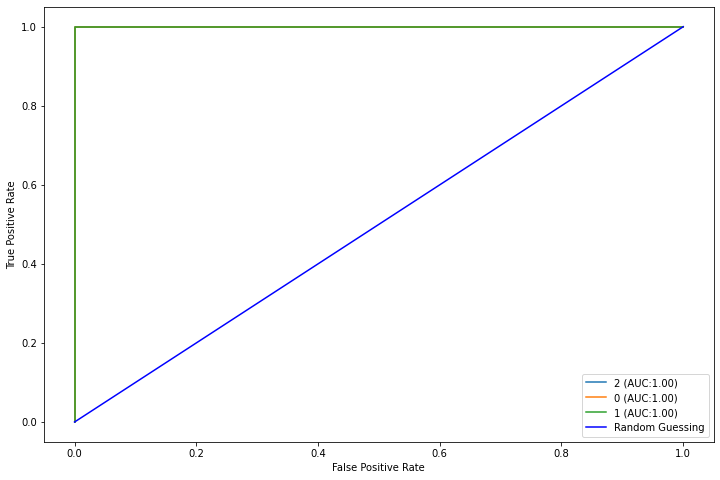

In [54]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)

    for (idx, c_label) in enumerate(classes):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

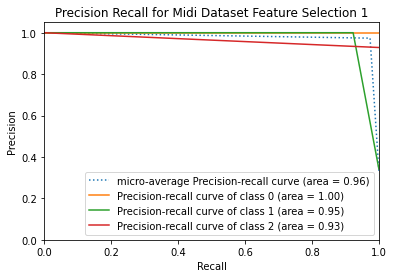

In [49]:
# Compute Precision-Recall and plot curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        onehot_encoded[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], onehot_encoded[:, i])

# Compute micro-average ROC curve and ROC area
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    onehot_encoded.ravel())
average_precision["micro"] = average_precision_score(y_test, onehot_encoded,
                                                     average="micro")


# Plot Precision-Recall curve for each class
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]), linestyle=':')
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall for Midi Dataset Feature Selection 1')
plt.legend(loc="lower right")
plt.show()